# Урок 2.  
# Масштабирование признаков.  
# L1- и L2-регуляризация.  
# Стохастический градиентный спуск

На этом уроке мы продолжим исследовать линейные модели,  
узначем, зачем для линейных моделей нужно масштабировать признаки,  
реализуем свою линейную регрессию с регуляризацией  
и усовршенствуем наш алгоритм градиентного спуска, сделав его стохастическим.  
Поехали!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]]).T

In [3]:
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])
y.shape

(10,)

# Виды масштабирования признаков

![img/normalization.png](img/normalization.png)

### MinMaxScaler  

$$\large X_{norm} = \frac{X – X_{min}}{X_{max}-X_{min}}$$

In [4]:
X[:,1].min(), X[:,1].max()

(0, 10)

In [5]:
X[:,2].min(), X[:,2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [7]:
X_norm[:,1] = (X[:,1] - X[:,1].min()) / (X[:,1].max() - X[:,1].min())
X_norm

array([[1.00e+00, 1.00e-01, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e-01, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e-01, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e-01, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e-01, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e-01, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e-01, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e-01, 1.00e+03, 2.00e+00]])

In [8]:
X_norm[:,2] = (X[:,2] - X[:,2].min()) / (X[:,2].max() - X[:,2].min())
X_norm

array([[1.        , 0.1       , 0.03225806, 1.        ],
       [1.        , 0.1       , 0.16129032, 1.        ],
       [1.        , 0.2       , 0.19354839, 2.        ],
       [1.        , 0.1       , 0.09677419, 1.        ],
       [1.        , 0.3       , 0.64516129, 2.        ],
       [1.        , 0.        , 0.22580645, 1.        ],
       [1.        , 0.5       , 0.67741935, 3.        ],
       [1.        , 1.        , 1.        , 3.        ],
       [1.        , 0.1       , 0.        , 1.        ],
       [1.        , 0.2       , 0.35483871, 2.        ]])

### Стандартизация  

$$\large X_{norm} = \frac{X – X_{mean}}{std}$$

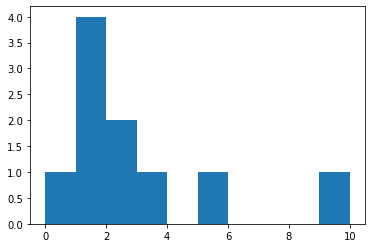

In [9]:
plt.hist(X[:,1]);

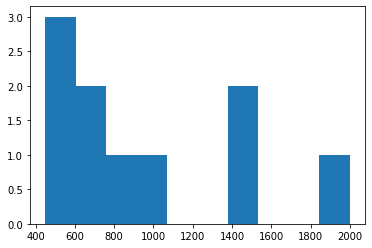

In [10]:
plt.hist(X[:,2]);

In [11]:
X1_mean = X[:,1].mean()
X1_mean

2.6

In [12]:
X1_std = X[:,1].std()
X1_std

2.8000000000000003

In [13]:
X_st = X.copy().astype(np.float64)

In [14]:
X_st[:,1] = (X[:,1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00, -5.71428571e-01,  5.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  7.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -2.14285714e-01,  7.50000000e+02,
         2.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  6.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00,  1.42857143e-01,  1.45000000e+03,
         2.00000000e+00],
       [ 1.00000000e+00, -9.28571429e-01,  8.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00,  8.57142857e-01,  1.50000000e+03,
         3.00000000e+00],
       [ 1.00000000e+00,  2.64285714e+00,  2.00000000e+03,
         3.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  4.50000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -2.14285714e-01,  1.00000000e+03,
         2.00000000e+00]])

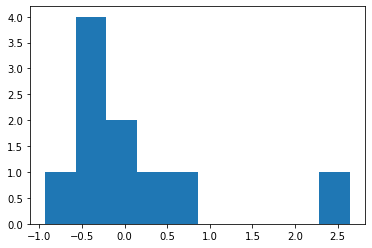

In [15]:
plt.hist(X_st[:,1]);

In [16]:
def custom_StandardScaler(x):
    res = (x - x.mean()) / x.std()
    return res

In [17]:
X_st[:,2] = custom_StandardScaler(X[:,2])

In [18]:
X_st[:,3] = custom_StandardScaler(X[:,3])
X_st

array([[ 1.        , -0.57142857, -0.97958969, -0.89625816],
       [ 1.        , -0.57142857, -0.56713087, -0.89625816],
       [ 1.        , -0.21428571, -0.46401617,  0.38411064],
       [ 1.        , -0.57142857, -0.77336028, -0.89625816],
       [ 1.        ,  0.14285714,  0.97958969,  0.38411064],
       [ 1.        , -0.92857143, -0.36090146, -0.89625816],
       [ 1.        ,  0.85714286,  1.08270439,  1.66447944],
       [ 1.        ,  2.64285714,  2.11385144,  1.66447944],
       [ 1.        , -0.57142857, -1.08270439, -0.89625816],
       [ 1.        , -0.21428571,  0.05155735,  0.38411064]])

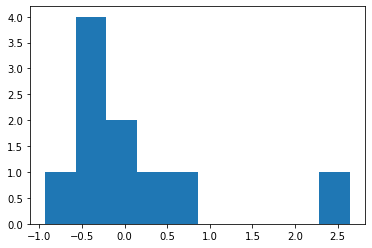

In [19]:
plt.hist(X_st[:,1]);

# SGD

![img/lr_gradient_descent.gif](img/lr_gradient_descent.gif)

Как нейронные сети обучаются с помощью градиентного спуска:  
https://www.youtube.com/watch?v=IHZwWFHWa-w

In [20]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [21]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [22]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

# итерация: 100, MSE: 103.00686174344897, веса: [49.64615708  4.61859428  3.48657325  3.49556832]
# итерация: 200, MSE: 41.31397784637481, веса: [56.3716888   4.89331606  3.16072354  3.59049975]
# итерация: 300, MSE: 40.09968488327226, веса: [57.26362582  5.10793281  2.87695758  3.66342418]
# итерация: 400, MSE: 39.988567101644065, веса: [57.38191412  5.28419273  2.63949234  3.72769189]
# итерация: 500, MSE: 39.924236688672224, веса: [57.39760146  5.42917868  2.44084196  3.78392831]
# итерация: 600, MSE: 39.87973114321004, веса: [57.39968191  5.54859159  2.27469055  3.83282598]
# итерация: 700, MSE: 39.84877155250129, веса: [57.39995781  5.64705831  2.13574274  3.87511869]
# итерация: 800, MSE: 39.82722286873958, веса: [57.39999441  5.72834182  2.01956069  3.91153653]
# итерация: 900, MSE: 39.812219009229004, веса: [57.39999926  5.79550853  1.92242651  3.94277761]
# итерация: 1000, MSE: 39.80176910709868, веса: [57.3999999   5.85106186  1.84122646  3.96949156]


array([57.3999999 ,  5.85106186,  1.84122646,  3.96949156])

In [23]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [24]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=5, alpha=1e-2)

# итерация: 500, MSE: 41.01241749571269, веса: [57.39601824  5.65810757  2.28443847  3.73816793]
# итерация: 1000, MSE: 39.3505299159068, веса: [57.39805161  5.94002361  1.770133    3.97622615]
# итерация: 1500, MSE: 38.70513704492622, веса: [57.39789715  6.05934211  1.56221745  4.06708141]
# итерация: 2000, MSE: 38.449992369436046, веса: [57.39783344  6.1089525   1.47804294  4.10254905]
# итерация: 2500, MSE: 38.34791899677285, веса: [57.39780734  6.12937235  1.44393565  4.11659999]
# итерация: 3000, MSE: 38.30682583709677, веса: [57.3977967   6.13772809  1.43010831  4.12221832]
# итерация: 3500, MSE: 38.29022617480424, веса: [57.39779236  6.14113545  1.42450088  4.12447774]
# итерация: 4000, MSE: 38.28350816679532, веса: [57.3977906   6.14252208  1.42222646  4.12538957]
# итерация: 4500, MSE: 38.280786479888626, веса: [57.39778989  6.14308568  1.42130384  4.12575833]
# итерация: 5000, MSE: 38.27968317168647, веса: [57.3977896   6.1433146   1.42092955  4.12590765]


array([57.3977896 ,  6.1433146 ,  1.42092955,  4.12590765])

### Регуляризация  

По сути, регуляризация - это ограничение модели.  
Для нас это, прежде всего, способ уменьшить сложность модели, чтобы предотвратить переобучение.
Проблема: признаки могут иметь линейную (или почти линейную) зависимость.  
Если у нас есть такие признаки, модель будет не устойчива к изменению в данных (большой variance).  
Чтобы побороть этот эффект, модель при обучении дополнительно ограничивают, используя **регуляризацию**.

Подробнее здесь:  
https://habr.com/ru/company/ods/blog/323890/  
и здесь:  
https://habr.com/ru/company/ods/blog/322076/  

L1 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right)  + \lambda \sum_{j=1}^m \left| w_j \right|$$

L2 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda \frac{1}{2} \sum_{j=1}^m w_j^2$$

In [25]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [26]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

# итерация: 500, MSE: 39.98166412253417, веса: [57.39479705  5.10767868  2.46037345  4.08674902]
# итерация: 1000, MSE: 39.80723120406399, веса: [57.39713005  5.765859    1.85689028  4.03893236]
# итерация: 1500, MSE: 39.78240504280036, веса: [57.39713014  5.99060723  1.60529698  4.06885866]
# итерация: 2000, MSE: 39.778523565788916, веса: [57.39713014  6.07152025  1.50155606  4.09300748]
# итерация: 2500, MSE: 39.77788748617126, веса: [57.39713014  6.10185559  1.45905205  4.10572941]
# итерация: 3000, MSE: 39.777779304702605, веса: [57.39713014  6.11355928  1.44170275  4.11160375]
# итерация: 3500, MSE: 39.77775983405893, веса: [57.39713014  6.11816175  1.43463681  4.11416107]
# итерация: 4000, MSE: 39.77775594321602, веса: [57.39713014  6.11999396  1.43176283  4.1152412 ]
# итерация: 4500, MSE: 39.777755024514185, веса: [57.39713014  6.12072893  1.43059479  4.11568989]
# итерация: 5000, MSE: 39.77775476050768, веса: [57.39713014  6.12102515  1.4301203   4.11587451]


array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

### Домашнее задание:  
1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  
3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

**Ответы**

1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [27]:
# Добавим немного бибилиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Еще раз инициируем цикл
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_ * W) 

    return W

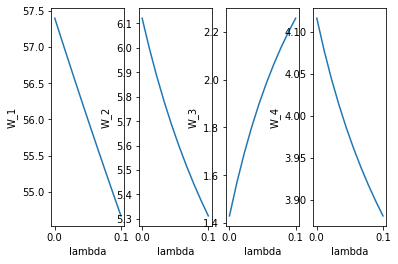

In [29]:
# Соберем полученные данные и сложим в датафрейм
data=pd.DataFrame()
for l in np.linspace(1e-1,1e-4 , 10):
    W=eval_model_reg2(X_st, y, iterations=1000, alpha=1e-1, lambda_=l)
    temp_data=pd.DataFrame({"lambda":[l],'W_1':W[0],'W_2':W[1],'W_3':W[2],'W_4':W[3]})
    data=data.append(temp_data)

# Раскидаем данные по разным графикам    
fig, axs = plt.subplots(ncols=4)
sns.lineplot(x='lambda',y='W_1', data=data, ax=axs[0])
sns.lineplot(x='lambda',y='W_2', data=data, ax=axs[1])
sns.lineplot(x='lambda',y='W_3', data=data, ax=axs[2])
sns.lineplot(x='lambda',y='W_4', data=data, ax=axs[3])

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию? 

**Применить можно (но смысла в этом нет**), в итоге получается , что мы приводим все признаки к формату значении от минимума к максимуму. И после этого применяем стандартизацию , что позволит оценить признаки в контексте отклонении от среднее и деленной на стандартную ошибку. С тем же успехом мы могли бы применить ту же стандартизацию и получить те же данные

3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

In [32]:
# Такое ошушение, что формула похоже и меняьт ничего не надо


def eval_model_reg_l1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_ * W) 

    return W